In [1]:
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
dataset = pd.read_excel('weather_dataset.xlsx')

In [3]:
print(len(dataset))

14


In [4]:
dataset.isnull().sum()

Day            0
Outlook        0
Temperature    0
Humidity       0
Wind           0
PlayCricket    0
dtype: int64

In [5]:
dataset.head()

,Day,Outlook,Temperature,Humidity,Wind,PlayCricket
0,1,Sunny,Hot,High,Weak,No
1,2,Sunny,Hot,High,Strong,No
2,3,Overcast,Hot,High,Weak,Yes
3,4,Rain,Mild,High,Weak,Yes
4,5,Rain,Cool,Normal,Weak,Yes


In [6]:
dataset.shape

(14, 6)

In [7]:
dataset.columns.duplicated()

array([False, False, False, False, False, False])

In [8]:
dataset.duplicated().sum()

0

In [9]:
print(dataset.Outlook.value_counts())
print(dataset.Temperature.value_counts())
print(dataset.Humidity.value_counts())
print(dataset.Wind.value_counts())
print(dataset.PlayCricket.value_counts())

Sunny       5
Rain        5
Overcast    4
Name: Outlook, dtype: int64
Mild    6
Hot     4
Cool    4
Name: Temperature, dtype: int64
High      7
Normal    7
Name: Humidity, dtype: int64
Weak      8
Strong    6
Name: Wind, dtype: int64
Yes    9
No     5
Name: PlayCricket, dtype: int64


In [10]:
dataset.replace({'Outlook':{'Sunny':0,'Rain':1,'Overcast':2}},inplace=True)

dataset.replace({'Temperature':{'Mild':0,'Hot':1,'Cool':2}},inplace=True)

dataset.replace({'Humidity':{'High':0,'Normal':1}},inplace=True)

dataset.replace({'Wind':{'Weak':0,'Strong':1}},inplace=True)

dataset.replace({'PlayCricket':{'Yes':0,'No':1}},inplace=True)

In [11]:
dataset

,Day,Outlook,Temperature,Humidity,Wind,PlayCricket
0,1,0,1,0,0,1
1,2,0,1,0,1,1
2,3,2,1,0,0,0
3,4,1,0,0,0,0
4,5,1,2,1,0,0
5,6,1,2,1,1,1
6,7,2,2,1,1,0
7,8,0,0,0,0,1
8,9,0,2,1,0,0
9,10,1,0,1,0,0


In [12]:
x = dataset.drop('PlayCricket',axis=1)

In [13]:
y = dataset['PlayCricket']

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=1)

In [15]:
print(x)

    Day  Outlook  Temperature  Humidity  Wind
0     1        0            1         0     0
1     2        0            1         0     1
2     3        2            1         0     0
3     4        1            0         0     0
4     5        1            2         1     0
5     6        1            2         1     1
6     7        2            2         1     1
7     8        0            0         0     0
8     9        0            2         1     0
9    10        1            0         1     0
10   11        0            0         1     1
11   12        2            0         0     1
12   13        2            1         1     0
13   14        1            0         0     1


In [16]:
print(y)

0     1
1     1
2     0
3     0
4     0
5     1
6     0
7     1
8     0
9     0
10    0
11    0
12    0
13    1
Name: PlayCricket, dtype: int64


In [17]:
clf_entropy = DecisionTreeClassifier(criterion = 'entropy', random_state=0)

In [18]:
clf_entropy.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [19]:
prediction = clf_entropy.predict(x_test)

In [20]:
print(prediction)

[0 0]


In [21]:
print(confusion_matrix(y_test, prediction))

[[1 0]
 [1 0]]


In [22]:
print(accuracy_score(y_test,prediction))

0.5


In [23]:
from matplotlib import pyplot as plt

In [24]:
text_representation = tree.export_text(clf_entropy)

In [25]:
print(text_representation)

|--- feature_0 <= 2.50
|   |--- class: 1
|--- feature_0 >  2.50
|   |--- feature_0 <= 13.50
|   |   |--- feature_0 <= 6.50
|   |   |   |--- feature_4 <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_4 >  0.50
|   |   |   |   |--- class: 1
|   |   |--- feature_0 >  6.50
|   |   |   |--- class: 0
|   |--- feature_0 >  13.50
|   |   |--- class: 1



In [26]:
fig = plt.figure(figsize=(70,50))

<Figure size 5040x3600 with 0 Axes>

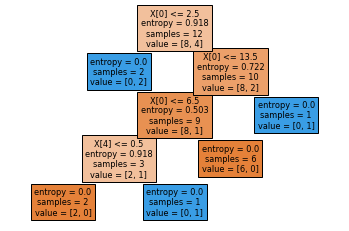

In [27]:
gg = tree.plot_tree(clf_entropy, filled=True)

In [ ]:
fig.savefig("wea.png")